# Introduction

<font color=gray size=3><b>Impact of Pruritus on sleep disturbances in Psoriasis patients

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as sm

# Dataset

In [2]:
dataset = pd.read_csv('masterchart.csv')
print(f"{dataset.shape=}")
dataset.head()

dataset.shape=(100, 13)


,Age,Gender,Marital Status,Occupation,Duration,Type,Nail Changes,Joint Pain,DM,HTN,PASI,PSQI,PSS
0,18,Male,Unmarried,Student,3,Guttate,0,0,0,0,5,7,13
1,34,Male,Married,Driver,48,Chronic Plaque,1,0,0,0,14,9,9
2,19,Female,Unmarried,Student,24,Chronic Plaque,0,0,0,0,7,5,4
3,37,Female,Married,Homemaker,120,Chronic Plaque,1,0,1,0,4,5,8
4,27,Male,Unmarried,Professional,60,Chronic Plaque,1,1,0,0,8,8,15


# Statistical Analysis

## Age Group

In [3]:
def assign_age_group(age: int) -> str:
    """assigns and returns applicable age group"""
    if age <=30:
        return '18 - 30'
    elif age <= 40:
        return '31 - 40'
    elif age <= 50:
        return '41 - 50'
    elif age <= 60:
        return '51 - 60'
    elif age <=70:
        return '61 - 70'
    elif age <= 80:
        return '71 - 80'
    else:
        return '81 - 100'

In [4]:
dataset['Age Group'] = dataset['Age'].apply(assign_age_group)

In [5]:
dataset['Age Group'].value_counts().to_frame().sort_index()

,count
Age Group,
18 - 30,29
31 - 40,19
41 - 50,23
51 - 60,12
61 - 70,11
71 - 80,6


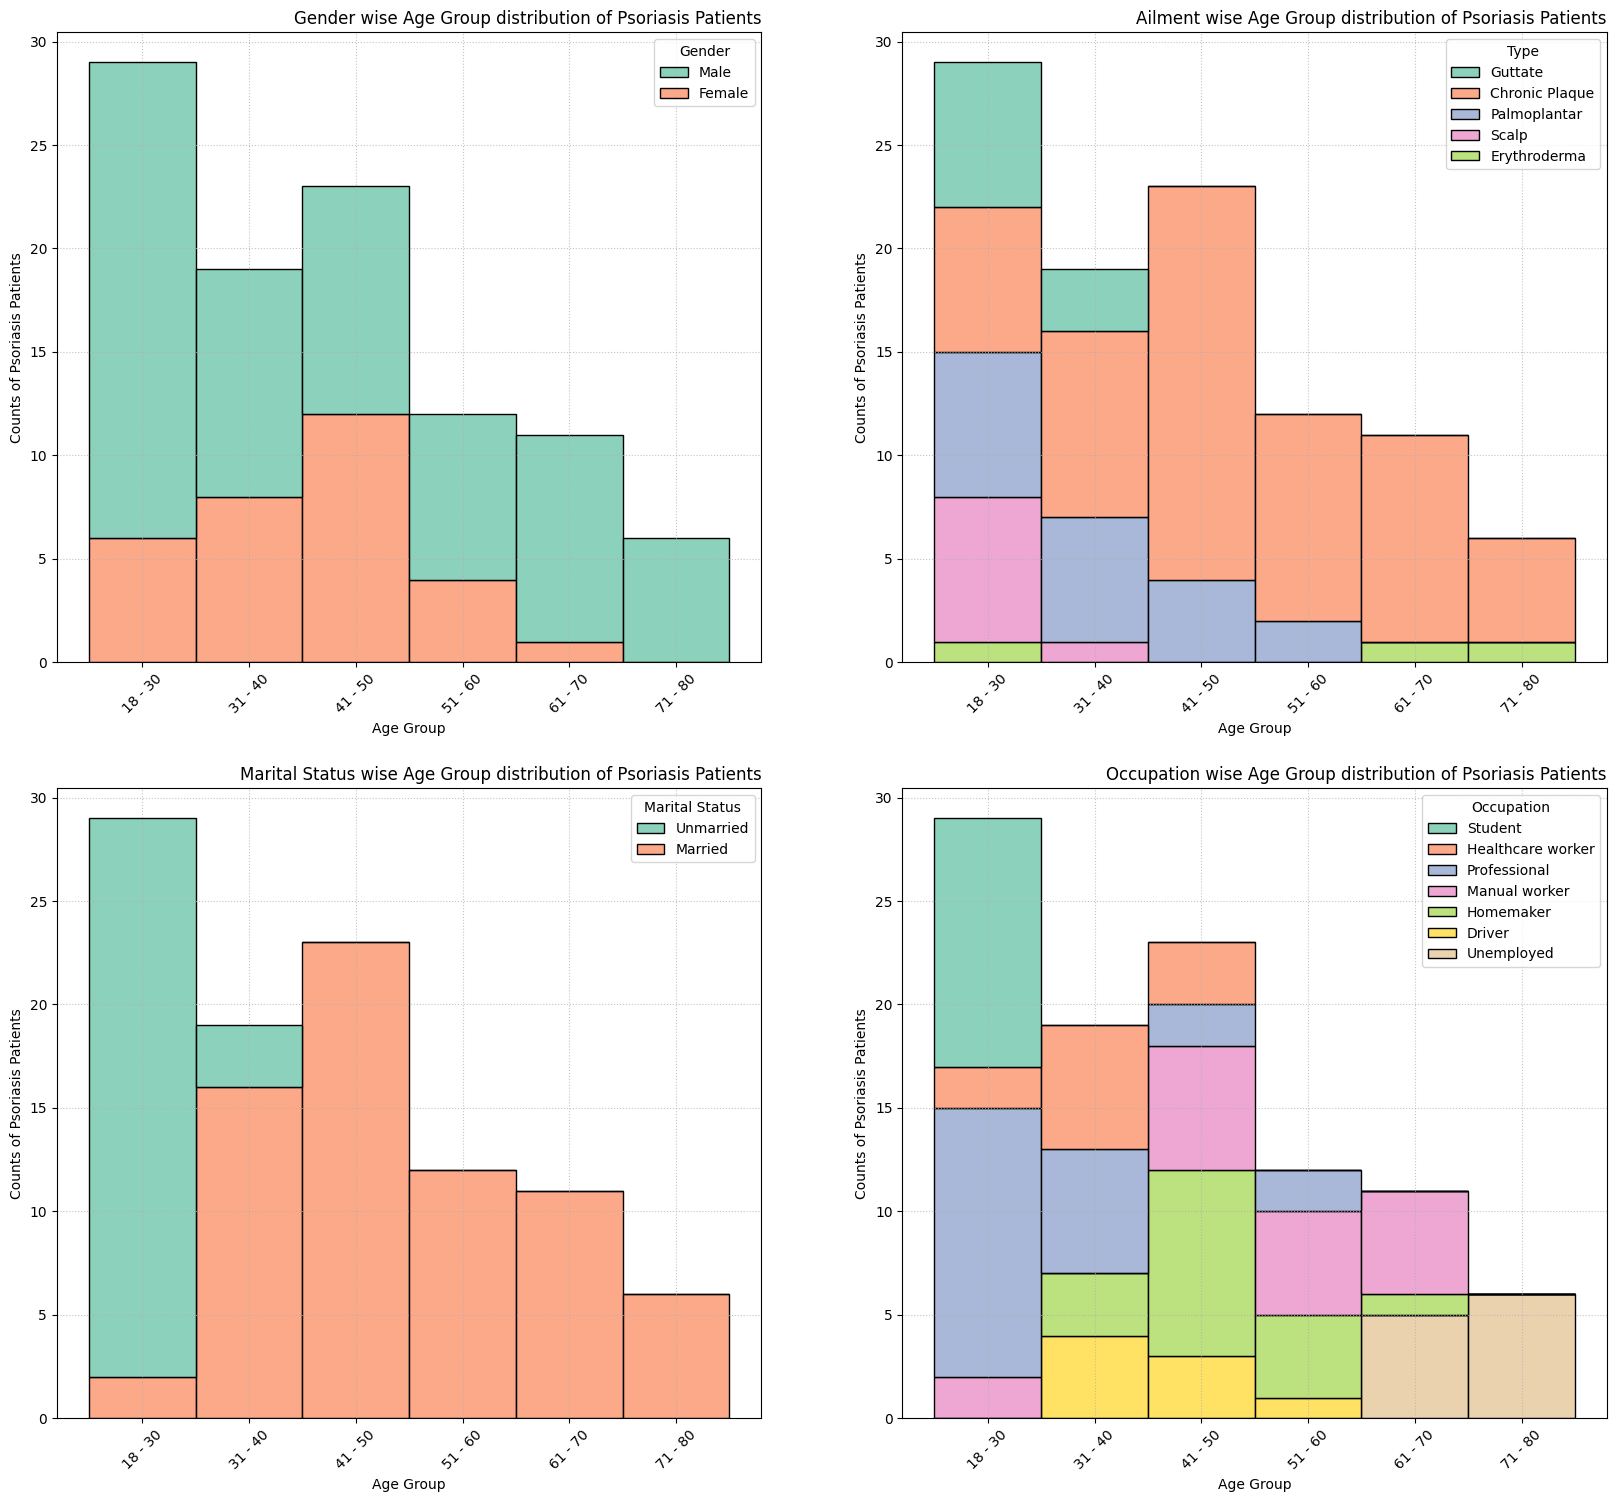

In [6]:
plt.figure(figsize=(20, 18))

ax1 = plt.subplot(221)
sns.histplot(data=dataset.sort_values('Age Group'), x='Age Group', hue='Gender', multiple='stack', palette='Set2', ax=ax1)
plt.title("Gender wise Age Group distribution of Psoriasis Patients", loc='right')
plt.ylabel('Counts of Psoriasis Patients')
plt.grid(alpha=0.75, linestyle=':')
plt.xticks(rotation=45)

ax2 = plt.subplot(222)
sns.histplot(data=dataset.sort_values('Age Group'), x='Age Group', hue='Type', multiple='stack', palette='Set2', ax=ax2)
plt.title("Ailment wise Age Group distribution of Psoriasis Patients", loc='right')
plt.ylabel('Counts of Psoriasis Patients')
plt.grid(alpha=0.75, linestyle=':')
plt.xticks(rotation=45)

ax3 = plt.subplot(223)
sns.histplot(data=dataset.sort_values('Age Group'), x='Age Group', hue='Marital Status', multiple='stack', palette='Set2', ax=ax3)
plt.title("Marital Status wise Age Group distribution of Psoriasis Patients", loc='right')
plt.ylabel('Counts of Psoriasis Patients')
plt.grid(alpha=0.75, linestyle=':')
plt.xticks(rotation=45)

ax4 = plt.subplot(224)
sns.histplot(data=dataset.sort_values('Age Group'), x='Age Group', hue='Occupation', multiple='stack', palette='Set2', ax=ax4)
plt.title("Occupation wise Age Group distribution of Psoriasis Patients", loc='right')
plt.ylabel('Counts of Psoriasis Patients')
plt.grid(alpha=0.75, linestyle=':')
plt.xticks(rotation=45)

plt.show()

## Gender

In [7]:
gender_counts = dataset.Gender.value_counts().to_frame()

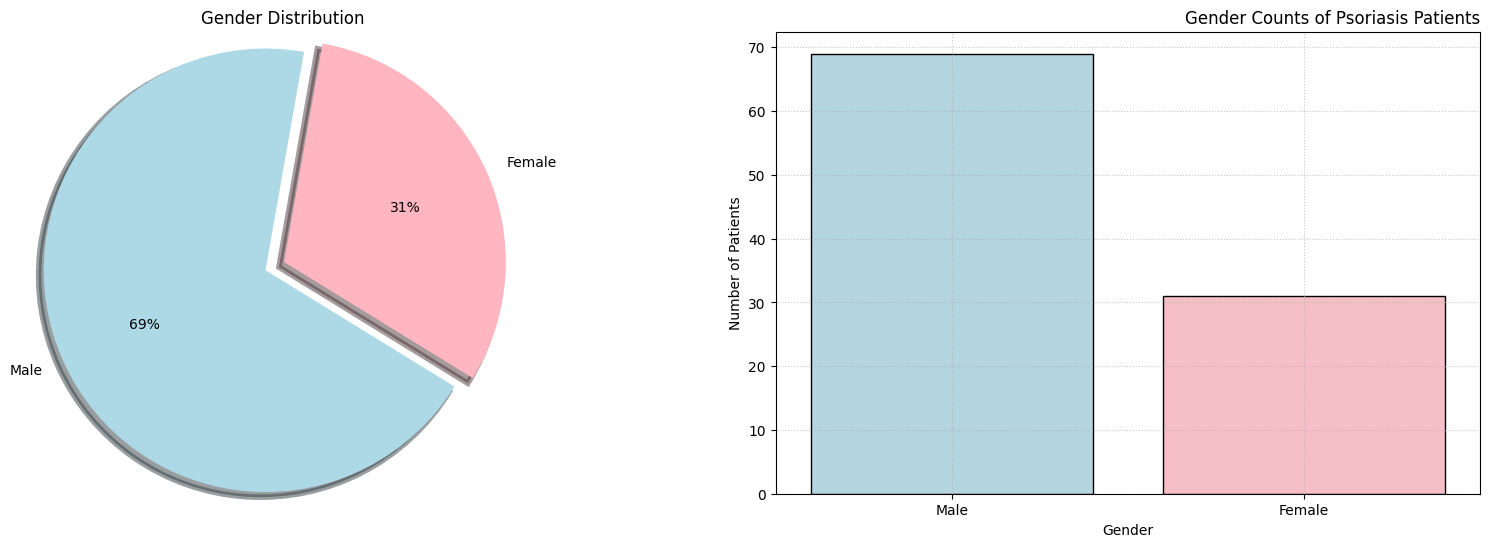

In [8]:
plt.figure(figsize=(20,6))

ax1 = plt.subplot(121)
ax1.set_aspect('equal')
plt.pie(gender_counts['count'], labels=gender_counts.index, autopct='%.0f%%', shadow=True, startangle=80, radius=1.2, colors=['lightblue', 'lightpink'], wedgeprops = {'linewidth': 4}, explode=[0.1, 0.01])
plt.title("Gender Distribution")

ax2 = plt.subplot(122)
sns.countplot(data=dataset, x='Gender', hue='Gender', palette=['lightblue', 'lightpink'], ax=ax2, edgecolor='black')
plt.grid(alpha=0.7, linestyle=':')
plt.ylabel("Number of Patients")
plt.title("Gender Counts of Psoriasis Patients", loc='right')

plt.show()

## Marital Status

In [9]:
marital_status_counts = dataset['Marital Status'].value_counts().to_frame()

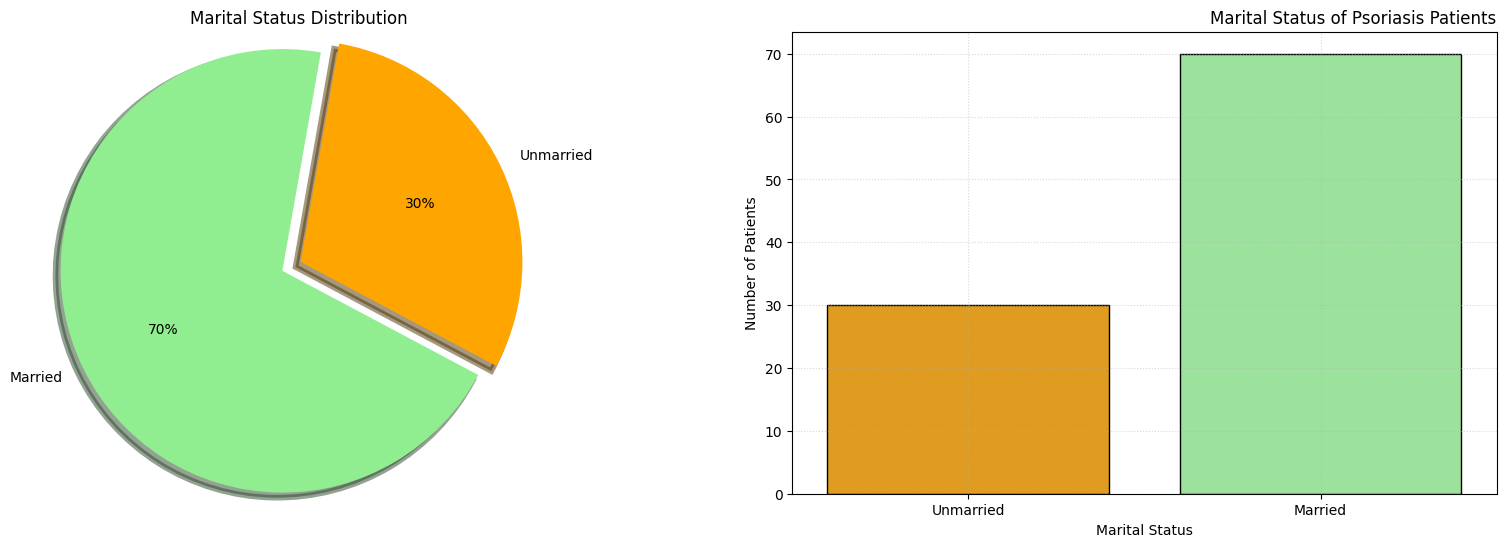

In [10]:
plt.figure(figsize=(20,6))

ax1 = plt.subplot(121)
ax1.set_aspect('equal')
plt.pie(marital_status_counts['count'], labels=marital_status_counts.index, autopct='%.0f%%', shadow=True, startangle=80, radius=1.2, colors=['lightgreen', 'orange'], wedgeprops = {'linewidth': 4}, explode=[0.1, 0.01])
plt.title("Marital Status Distribution")

ax2 = plt.subplot(122)
sns.countplot(data=dataset, x='Marital Status', hue='Marital Status', palette=['orange', 'lightgreen'], ax=ax2, edgecolor='black')
plt.grid(alpha=0.5, linestyle=':')
plt.ylabel("Number of Patients")
plt.title("Marital Status of Psoriasis Patients", loc='right')

plt.show()

## Occupation

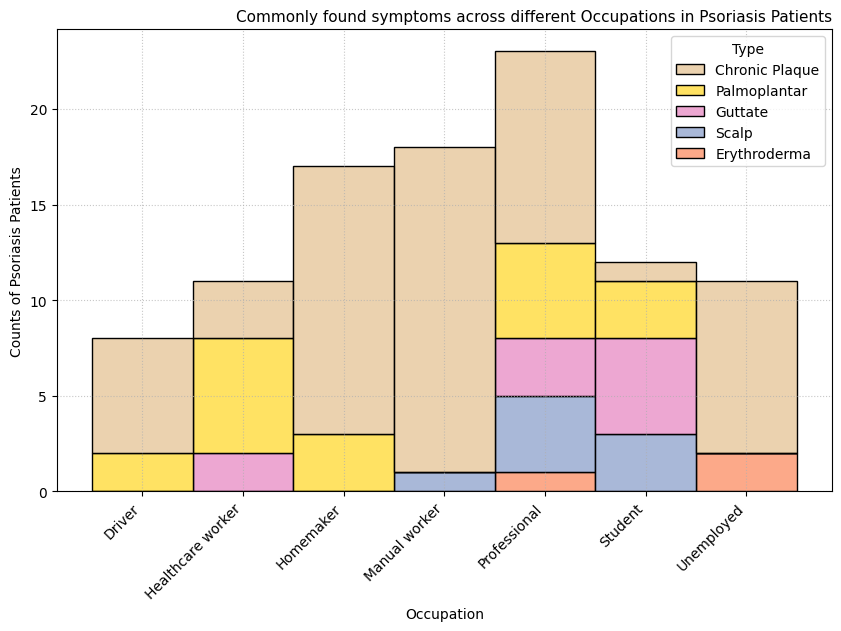

In [11]:
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(111)
sns.histplot(data=dataset.sort_values('Occupation'), x='Occupation', hue='Type', multiple='stack', palette='Set2_r', ax=ax1)
plt.title("Commonly found symptoms across different Occupations in Psoriasis Patients", loc='right', fontdict={'size': 11})
plt.ylabel('Counts of Psoriasis Patients')
plt.grid(alpha=0.7, linestyle=':')
plt.xticks(rotation=45, ha='right')

plt.show()

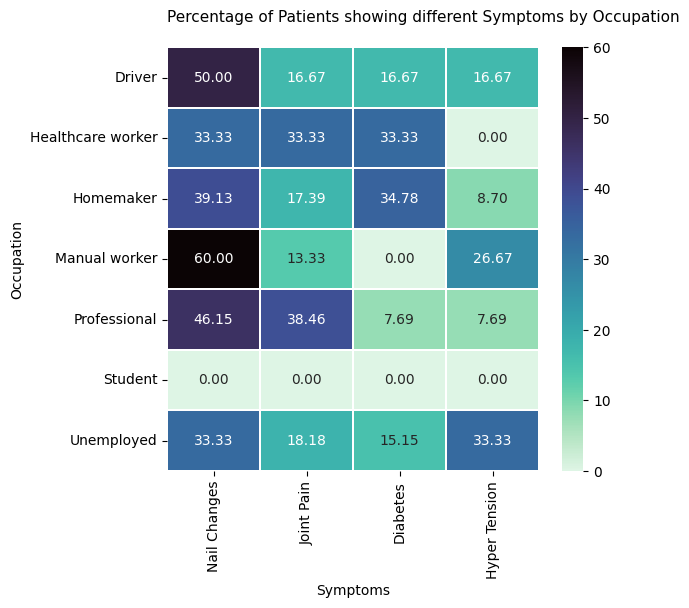

In [12]:
symptoms = dataset[['Occupation', 'Nail Changes', 'Joint Pain', 'DM', 'HTN']].rename(columns={'DM': 'Diabetes', 'HTN': 'Hyper Tension'})
grouped_counts = symptoms.groupby('Occupation').agg('sum')
grouped_counts_norm = grouped_counts.apply(lambda row: round(row*100/row.sum(), 2), axis='columns').fillna(0)

plt.figure(figsize=(6, 5.5))
ax1 = plt.subplot(111)
sns.heatmap(grouped_counts_norm, annot=True, fmt='.2f', linewidths=0.1, cmap='mako_r', ax=ax1)
plt.xticks(rotation=90)
plt.xlabel('Symptoms')
plt.title('Percentage of Patients showing different Symptoms by Occupation\n', loc='left', fontdict={'size': 11})
plt.show()

## Duration

Mean Duration

In [13]:
dataset['Duration'].mean()

85.83

In [14]:
dataset.groupby('Type')['Duration'].agg('mean').to_frame().round(1).rename(columns={'Duration': "Mean Duration (Months)"})

,Mean Duration (Months)
Type,
Chronic Plaque,113.8
Erythroderma,188.0
Guttate,2.1
Palmoplantar,46.7
Scalp,35.2


Median Duration

In [15]:
dataset['Duration'].median()

60.0

In [16]:
dataset.groupby('Type')['Duration'].agg('median').to_frame().round(1).rename(columns={'Duration': "Median Duration (Months)"})

,Median Duration (Months)
Type,
Chronic Plaque,96.0
Erythroderma,216.0
Guttate,2.0
Palmoplantar,48.0
Scalp,24.0


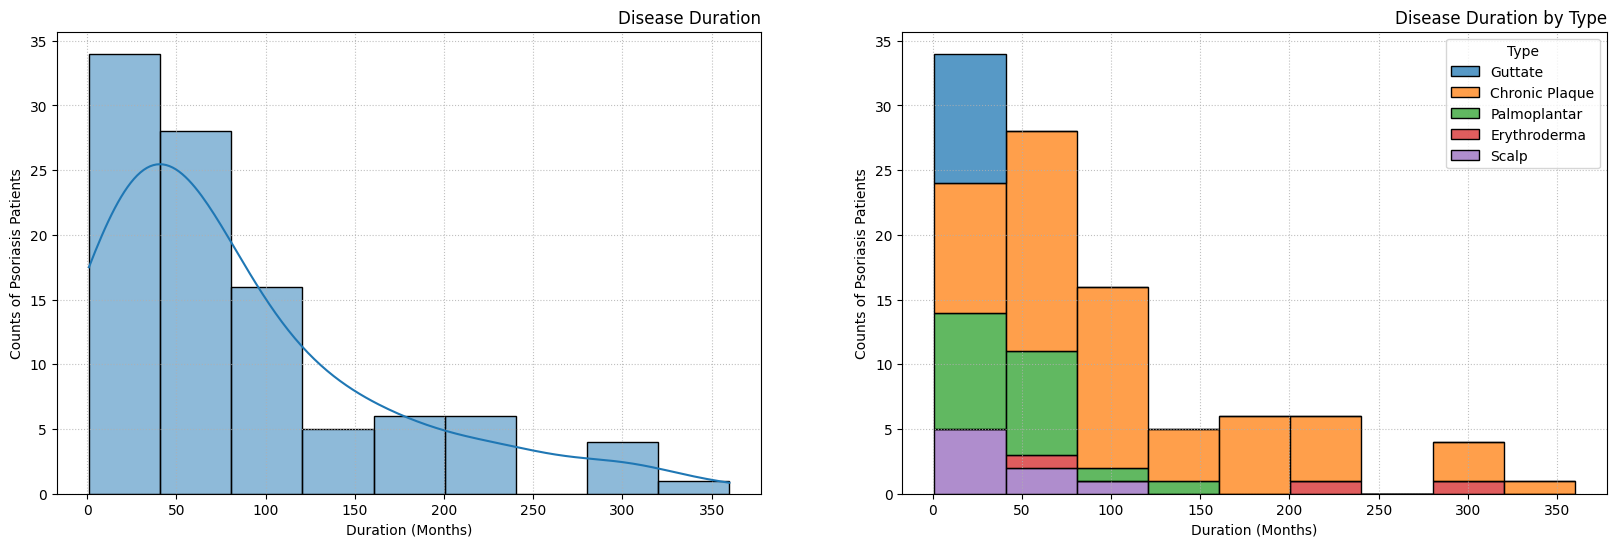

In [17]:
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(121)
sns.histplot(dataset['Duration'], kde=True, ax=ax1)
plt.grid(alpha=0.8, linestyle=':')
plt.ylabel('Counts of Psoriasis Patients')
plt.xlabel('Duration (Months)')
plt.title('Disease Duration', loc='right')

ax2 = plt.subplot(122)
sns.histplot(data=dataset, x='Duration', ax=ax2, hue='Type', multiple='stack')
plt.grid(alpha=0.8, linestyle=':')
plt.ylabel('Counts of Psoriasis Patients')
plt.xlabel('Duration (Months)')
plt.title('Disease Duration by Type', loc='right')

plt.show()

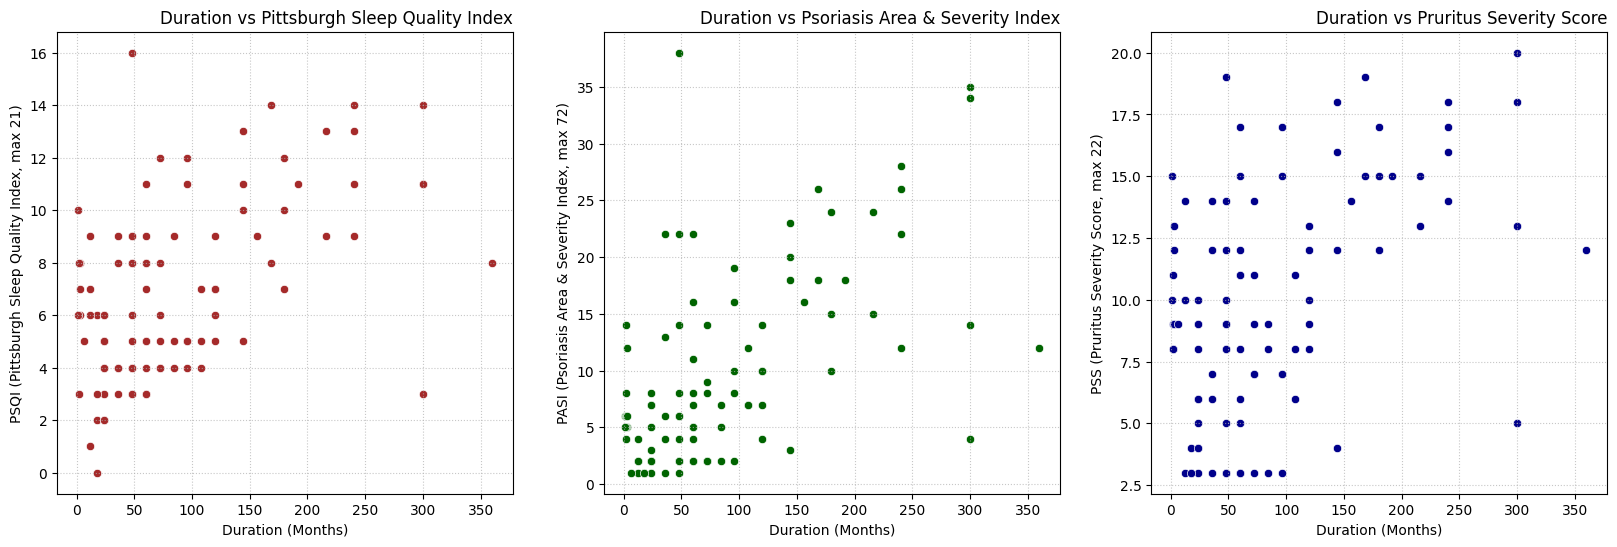

In [18]:
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(131)
sns.scatterplot(data=dataset, x='Duration', y='PSQI', ax=ax1, c='brown')
# sns.scatterplot(data=dataset, x='Duration', y='PSQI', hue='Type', ax=ax1)
plt.title('Duration vs Pittsburgh Sleep Quality Index', loc='right')
plt.ylabel('PSQI (Pittsburgh Sleep Quality Index, max 21)')
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('Duration (Months)')

ax2 = plt.subplot(132)
sns.scatterplot(data=dataset, x='Duration', y='PASI', ax=ax2, c='darkgreen')
plt.title('Duration vs Psoriasis Area & Severity Index', loc='right')
plt.ylabel('PASI (Psoriasis Area & Severity Index, max 72)')
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('Duration (Months)')

ax3 = plt.subplot(133)
sns.scatterplot(data=dataset, x='Duration', y='PSS', ax=ax3, c='darkblue')
plt.title('Duration vs Pruritus Severity Score', loc='right')
plt.ylabel('PSS (Pruritus Severity Score, max 22)')
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('Duration (Months)')

plt.show()

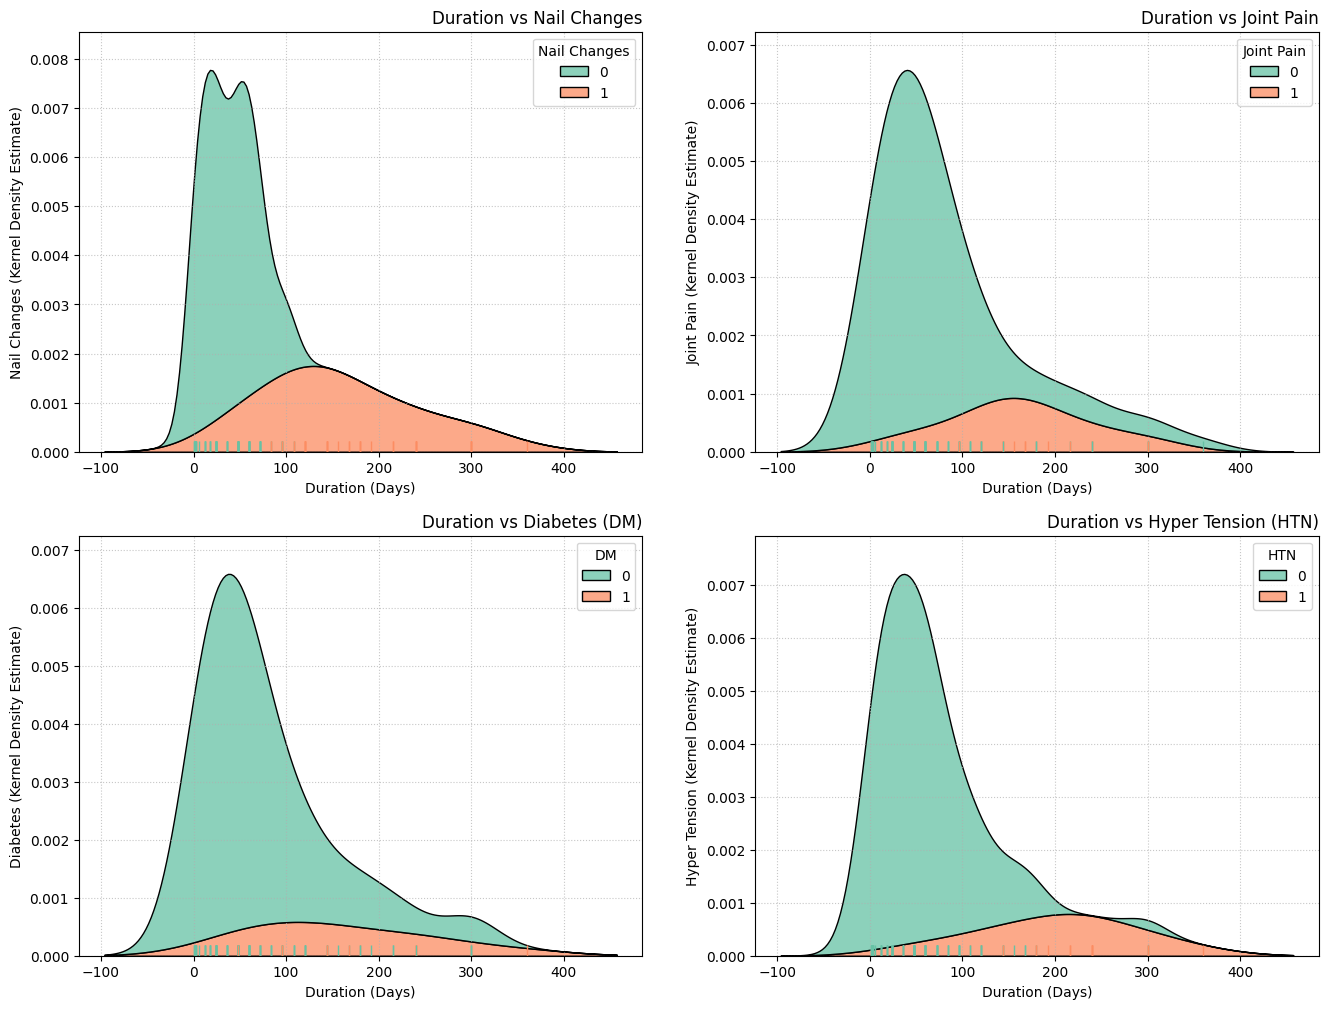

In [19]:
plt.figure(figsize=(16, 12))

ax1 = plt.subplot(221)
sns.kdeplot(data=dataset, x='Duration', fill=True, hue='Nail Changes', multiple='stack', palette='Set2', ax=ax1)
sns.rugplot(data=dataset, x='Duration', hue='Nail Changes', palette='Set2', legend=False, ax=ax1)
plt.title('Duration vs Nail Changes', loc='right')
plt.ylabel('Nail Changes (Kernel Density Estimate)')
plt.xlabel('Duration (Days)')
plt.grid(alpha=0.7, linestyle=':')

ax2 = plt.subplot(222)
sns.kdeplot(data=dataset, x='Duration', fill=True, hue='Joint Pain', multiple='stack', palette='Set2', ax=ax2)
sns.rugplot(data=dataset, x='Duration', hue='Joint Pain', palette='Set2', legend=False, ax=ax2)
plt.title('Duration vs Joint Pain', loc='right')
plt.ylabel('Joint Pain (Kernel Density Estimate)')
plt.xlabel('Duration (Days)')
plt.grid(alpha=0.7, linestyle=':')

ax3 = plt.subplot(223)
sns.kdeplot(data=dataset, x='Duration', fill=True, hue='DM', multiple='stack', palette='Set2', ax=ax3)
sns.rugplot(data=dataset, x='Duration', hue='DM', palette='Set2', legend=False, ax=ax3)
plt.title('Duration vs Diabetes (DM)', loc='right')
plt.ylabel('Diabetes (Kernel Density Estimate)')
plt.xlabel('Duration (Days)')
plt.grid(alpha=0.7, linestyle=':')

ax4 = plt.subplot(224)
sns.kdeplot(data=dataset, x='Duration', fill=True, hue='HTN', multiple='stack', palette='Set2', ax=ax4)
sns.rugplot(data=dataset, x='Duration', hue='HTN', palette='Set2', legend=False, ax=ax4)
plt.title('Duration vs Hyper Tension (HTN)', loc='right')
plt.ylabel('Hyper Tension (Kernel Density Estimate)')
plt.xlabel('Duration (Days)')
plt.grid(alpha=0.7, linestyle=':')

plt.show()

## Type

### PSQI

In [20]:
print(f"Mean PSQI: {dataset['PSQI'].mean()}")

dataset.groupby('Type')['PSQI'].agg('mean').to_frame().round(2).rename(columns={'PSQI': 'Mean PSQI'})

Mean PSQI: 6.87


,Mean PSQI
Type,
Chronic Plaque,7.52
Erythroderma,14.33
Guttate,6.60
Palmoplantar,3.95
Scalp,6.50


In [21]:
print(f"Median PSQI: {dataset['PSQI'].median()}")

dataset.groupby('Type')['PSQI'].agg('median').to_frame().round(2).rename(columns={'PSQI': 'Median PSQI'})

Median PSQI: 6.0


,Median PSQI
Type,
Chronic Plaque,7.5
Erythroderma,14.0
Guttate,6.0
Palmoplantar,4.0
Scalp,6.0


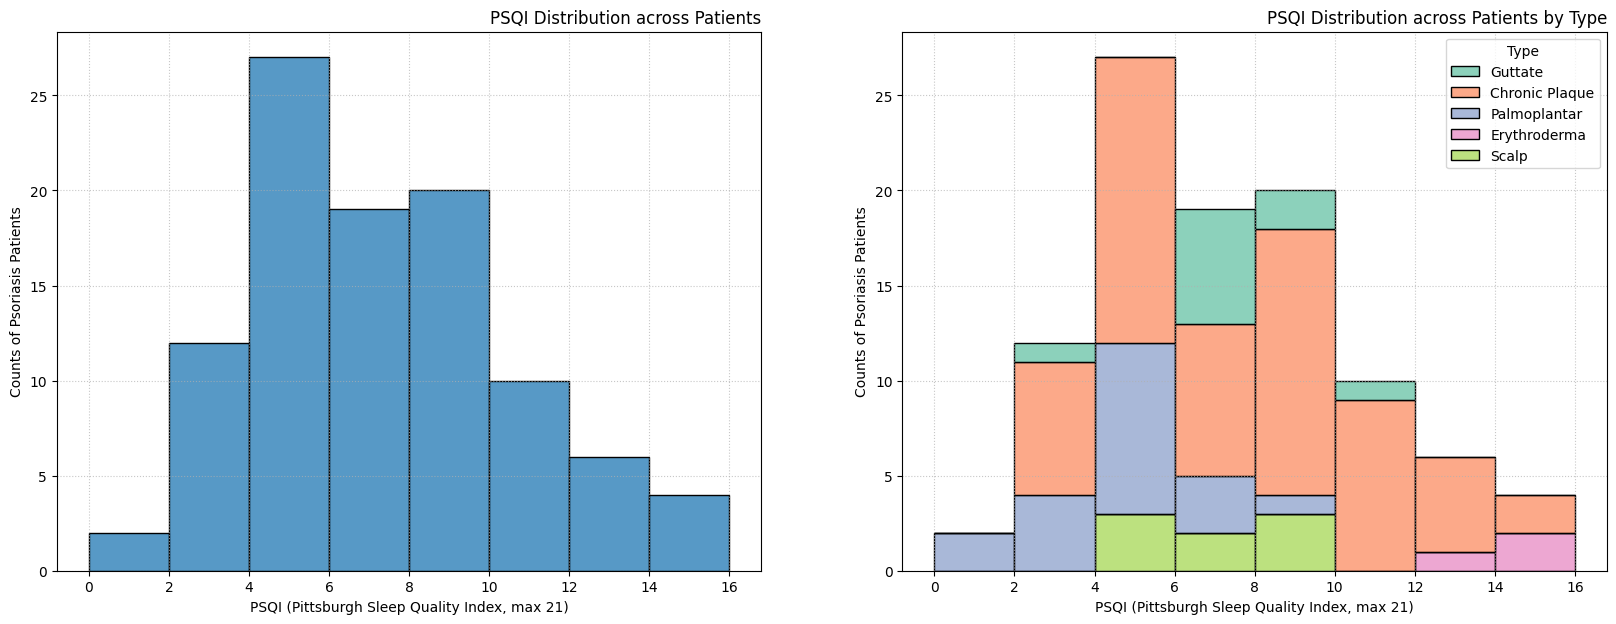

In [22]:
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(121) 
sns.histplot(data=dataset, x='PSQI', ax=ax1)
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('PSQI (Pittsburgh Sleep Quality Index, max 21)')
plt.ylabel('Counts of Psoriasis Patients')
plt.title('PSQI Distribution across Patients', loc='right')

ax2 = plt.subplot(122)
sns.histplot(data=dataset, x='PSQI', hue='Type', multiple='stack', ax=ax2, palette='Set2')
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('PSQI (Pittsburgh Sleep Quality Index, max 21)')
plt.ylabel('Counts of Psoriasis Patients')
plt.title('PSQI Distribution across Patients by Type', loc='right')

plt.show()

### PSS

In [23]:
print(f"Mean PSS: {dataset['PSS'].mean()}")

dataset.groupby('Type')['PSS'].agg('mean').to_frame().round(2).rename(columns={'PSS': 'Mean PSS'})

Mean PSS: 9.77


,Mean PSS
Type,
Chronic Plaque,11.02
Erythroderma,17.33
Guttate,10.30
Palmoplantar,4.16
Scalp,10.25


In [24]:
print(f"Median PSS: {dataset['PSS'].median()}")

dataset.groupby('Type')['PSS'].agg('median').to_frame().round(2).rename(columns={'PSS': 'Median PSS'})

Median PSS: 9.0


,Median PSS
Type,
Chronic Plaque,11.0
Erythroderma,18.0
Guttate,9.5
Palmoplantar,3.0
Scalp,9.5


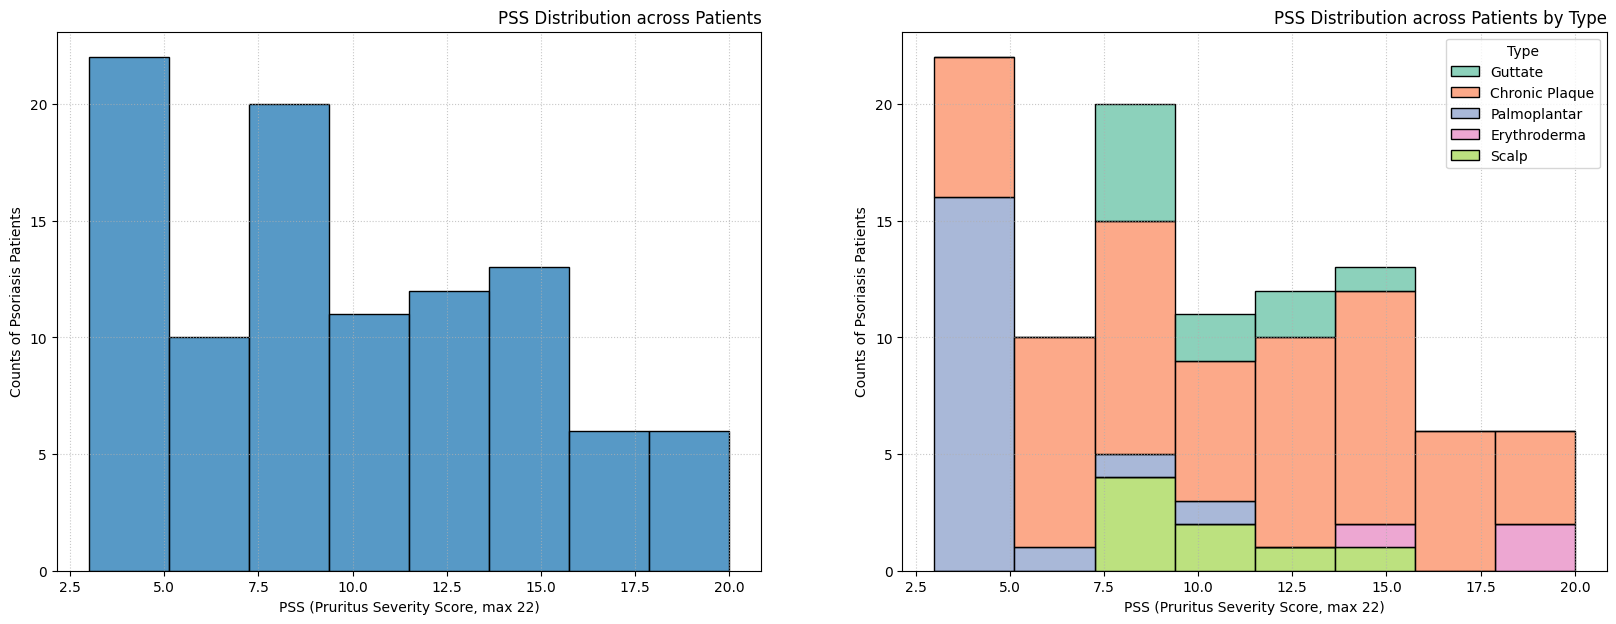

In [25]:
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(121)
sns.histplot(data=dataset, x='PSS', ax=ax1)
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('PSS (Pruritus Severity Score, max 22)')
plt.ylabel('Counts of Psoriasis Patients')
plt.title('PSS Distribution across Patients', loc='right')

ax2 = plt.subplot(122)
sns.histplot(data=dataset, x='PSS', hue='Type', multiple='stack', ax=ax2, palette='Set2')
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('PSS (Pruritus Severity Score, max 22)')
plt.ylabel('Counts of Psoriasis Patients')
plt.title('PSS Distribution across Patients by Type', loc='right')

plt.show()

### PASI

In [26]:
print(f"Mean PASI: {dataset['PASI'].mean()}")

dataset.groupby('Type')['PASI'].agg('mean').to_frame().round(2).rename(columns={'PASI': 'Mean PASI'})

Mean PASI: 9.53


,Mean PASI
Type,
Chronic Plaque,12.33
Erythroderma,32.00
Guttate,7.10
Palmoplantar,1.63
Scalp,1.88


In [27]:
print(f"Median PASI: {dataset['PASI'].median()}")

dataset.groupby('Type')['PASI'].agg('median').to_frame().round(2).rename(columns={'PASI': 'Median PASI'})

Median PASI: 7.0


,Median PASI
Type,
Chronic Plaque,10.0
Erythroderma,34.0
Guttate,6.0
Palmoplantar,2.0
Scalp,2.0


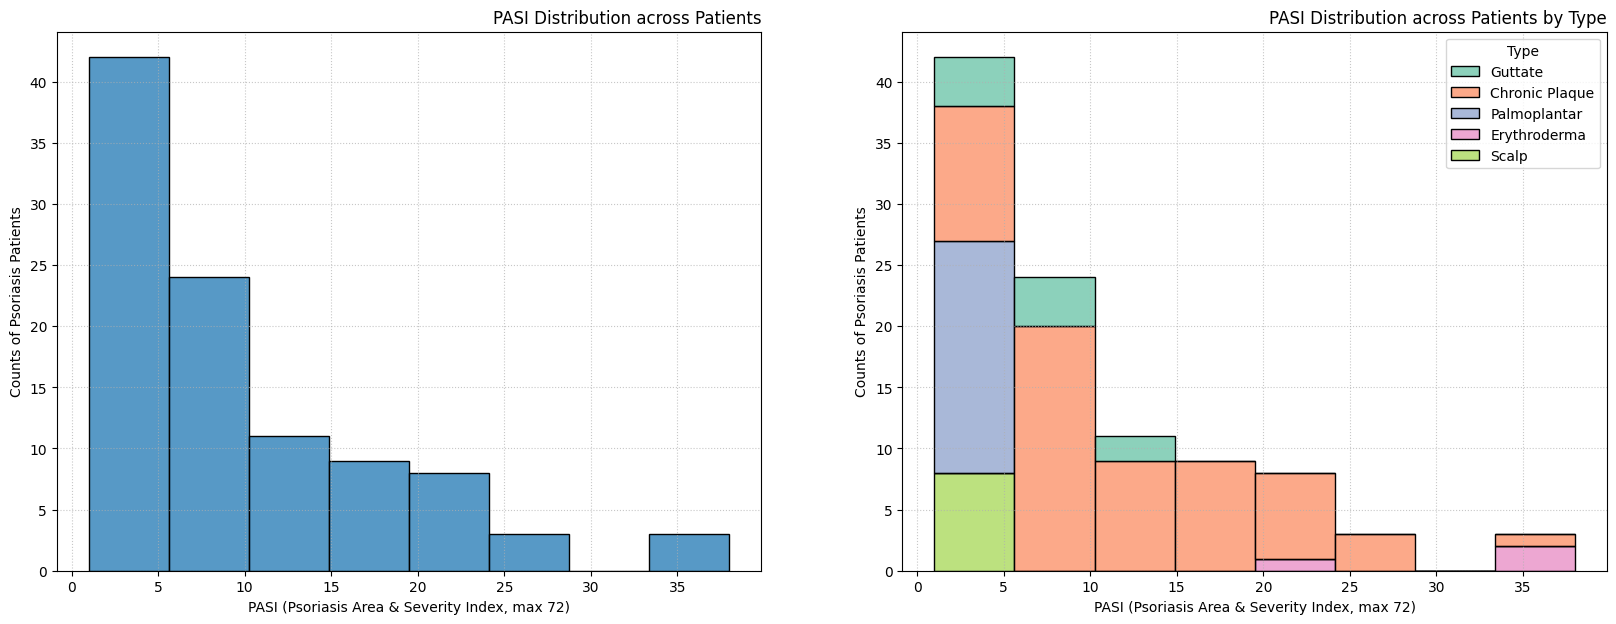

In [28]:
plt.figure(figsize=(20, 7))

ax1 = plt.subplot(121) 
sns.histplot(data=dataset, x='PASI', ax=ax1)
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('PASI (Psoriasis Area & Severity Index, max 72)')
plt.ylabel('Counts of Psoriasis Patients')
plt.title('PASI Distribution across Patients', loc='right')

ax2 = plt.subplot(122) 
sns.histplot(data=dataset, x='PASI', hue='Type', multiple='stack', ax=ax2, palette='Set2')
plt.grid(alpha=0.7, linestyle=':')
plt.xlabel('PASI (Psoriasis Area & Severity Index, max 72)')
plt.ylabel('Counts of Psoriasis Patients')
plt.title('PASI Distribution across Patients by Type', loc='right')

plt.show()

## Correlation Analysis

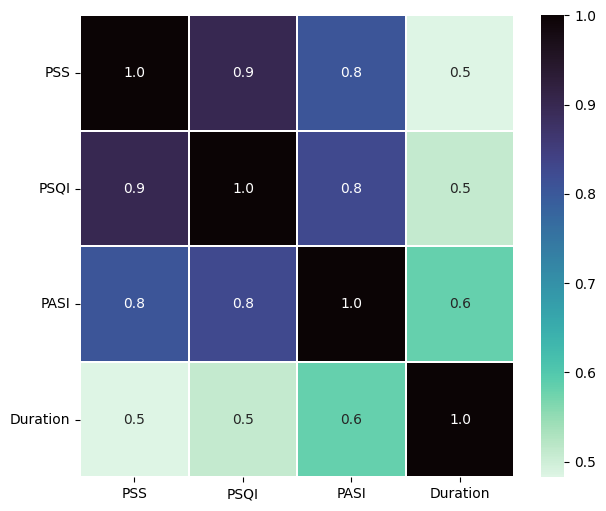

In [29]:
plt.figure(figsize=(7, 6))
ax = plt.subplot(111)
corr = dataset[['PSS', 'PSQI', 'PASI', 'Duration']].corr()
sns.heatmap(corr, annot=True, linewidth=0.1, fmt='.1f', ax=ax, cmap='mako_r')
plt.yticks(rotation=0)
plt.show()

## Hypothesis Testing

### Duration vs PSQI

<font color=brown size=2><b>
H0: Duration does not have any effect on PSQI</br>
H1: Duration has a significant effect on PSQI
</b></font>

In [30]:
x = dataset['Duration']
y = dataset['PSQI']

x_with_const = pd.concat([pd.Series(np.ones(dataset.shape[0])), x], axis='columns').rename(columns={0: 'const'})

model = sm.OLS(endog=y, exog=x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PSQI   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     34.22
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           6.51e-08
Time:                        22:45:29   Log-Likelihood:                -246.23
No. Observations:                 100   AIC:                             496.5
Df Residuals:                      98   BIC:                             501.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0945      0.418     12.201      0.0

<font color=brown size=2><b>Since, the p-value is lesser than 0.05 (5%), we can safely reject the Null Hypothesis

### Duration vs PSS

<font color=brown size=2><b>
H0: Duration does not have any effect on PSS</br>
H1: Duration has a significant effect on PSS
</b></font>

In [31]:
x = dataset['Duration']
y = dataset['PSS']

x_with_const = pd.concat([pd.Series(np.ones(dataset.shape[0])), x], axis='columns').rename(columns={0: 'const'})

model = sm.OLS(endog=y, exog=x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PSS   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     29.71
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           3.74e-07
Time:                        22:45:29   Log-Likelihood:                -282.42
No. Observations:                 100   AIC:                             568.8
Df Residuals:                      98   BIC:                             574.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3942      0.600     12.332      0.0

<font color=brown size=2><b>Since, the p-value is lesser than 0.05 (5%), we can safely reject the Null Hypothesis

### Duration vs PASI

<font color=brown size=2><b>
H0: Duration does not have any effect on PASI</br>
H1: Duration has a significant effect on PASI
</b></font>

In [32]:
x = dataset['Duration']
y = dataset['PASI']

x_with_const = pd.concat([pd.Series(np.ones(dataset.shape[0])), x], axis='columns').rename(columns={0: 'const'})

model = sm.OLS(endog=y, exog=x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PASI   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     50.58
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.89e-10
Time:                        22:45:29   Log-Likelihood:                -334.21
No. Observations:                 100   AIC:                             672.4
Df Residuals:                      98   BIC:                             677.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3271      1.006      4.299      0.0

<font color=brown size=2><b>Since, the p-value is lesser than 0.05 (5%), we can safely reject the Null Hypothesis

---

### Type vs PSS

<font color=brown size=2><b>
H0: Disease type does not have any effect on PSS</br>
H1: Disease type has a significant effect on PSS
</b></font>

In [33]:
x = pd.get_dummies(dataset['Type']).astype('int')
y = dataset['PSS']

x_with_const = pd.concat([pd.Series(np.ones(dataset.shape[0])), x], axis='columns').rename(columns={0: 'const'})

model = sm.OLS(endog=y, exog=x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PSS   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     15.88
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           5.47e-10
Time:                        22:45:29   Log-Likelihood:                -270.06
No. Observations:                 100   AIC:                             550.1
Df Residuals:                      95   BIC:                             563.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.8430      0.488     18.

##### Observations:
</br>
<font color=brown size=2><b>
* For Guttate and Scalp, since the p-values are more than 0.05 (5%), there is no statistically significant evidence to prove dependability on PSS. Therefore the Null Hypothesis cannot be rejected.</br></br>
* For other disease types, the p-values are lesser than 0.05 (5%), therefore, we can safely reject the Null Hypothesis. In other words, there is sufficient evidence to say that ailments such as Plaque, Erythroderma and Palmoplanter have significant relationship with PSS</br></br>
* Palmoplanter has inverse relationship with PSS. In other words, patients with Palmoplanter have relatively lower PSS 

### Type vs PASI

<font color=brown size=2><b>
H0: Disease type does not have any effect on PASI</br>
H1: Disease type has a significant effect on PASI
</b></font>

In [34]:
x = pd.get_dummies(dataset['Type']).astype('int')
y = dataset['PASI']

x_with_const = pd.concat([pd.Series(np.ones(dataset.shape[0])), x], axis='columns').rename(columns={0: 'const'})

model = sm.OLS(endog=y, exog=x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PASI   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     25.84
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.67e-14
Time:                        22:45:29   Log-Likelihood:                -318.20
No. Observations:                 100   AIC:                             646.4
Df Residuals:                      95   BIC:                             659.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.1567      0.790     11.

##### Observations:
</br>
<font color=brown size=2><b>
* For Guttate, since the p-value is more than 0.05, there is no statistically significant evidence to prove dependability on PASI. Therefore the Null Hypothesis cannot be rejected.</br></br>
* For all other disease types, the p-values are lesser than 0.05 (5%), therefore, we can safely reject the Null Hypothesis. In other words, there is sufficient evidence to say that ailments such as Plaque, Erythroderma, Palmoplanter and Scalp have significant relationship with PASI

---

### Type vs PSQI

<font color=brown size=2><b>
H0: Disease type does not have any effect on PSQI</br>
H1: Disease type has a significant effect on PSQI
</b></font>

In [35]:
x = pd.get_dummies(dataset['Type']).astype('int')
y = dataset['PSQI']

x_with_const = pd.concat([pd.Series(np.ones(dataset.shape[0])), x], axis='columns').rename(columns={0: 'const'})

model = sm.OLS(endog=y, exog=x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PSQI   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     11.58
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.07e-07
Time:                        22:45:29   Log-Likelihood:                -241.36
No. Observations:                 100   AIC:                             492.7
Df Residuals:                      95   BIC:                             505.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.4829      0.366     17.

##### Observations:
</br>
<font color=brown size=2><b>
* For Guttate and Scalp, since the p-values are more than 0.05 (5%), there is no statistically significant evidence to prove dependability on PSQI. Therefore the Null Hypothesis cannot be rejected.</br></br>
* For other disease types, the p-values are lesser than 0.05 (5%), therefore, we can safely reject the Null Hypothesis. In other words, there is sufficient evidence to say that ailments such as Plaque, Erythroderma and Palmoplanter have significant relationship with PSQI</br></br>
* Palmoplanter has inverse relationship with PSQI. In other words, patients with Palmoplanter have relatively lower PSQI.

---

### PASI vs PSS

<font color=brown size=2><b>
H0: PASI type does not have any effect on PSS</br>
H1: PASI type has a significant effect on PSS
</b></font>

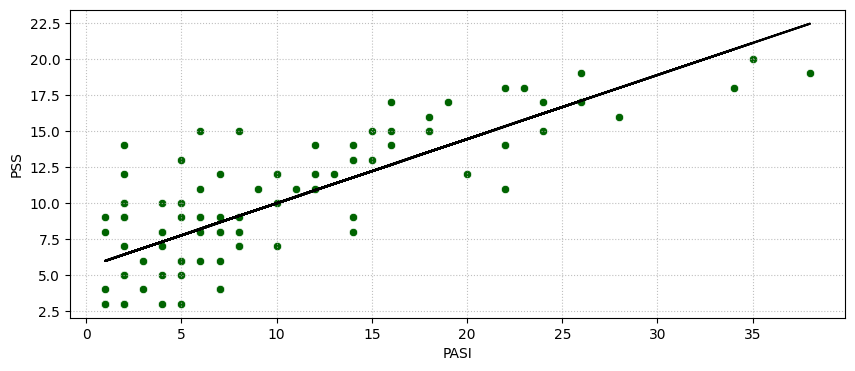

In [36]:
slope, intercept = np.polyfit(dataset['PASI'], dataset['PSS'], 1)

plt.figure(figsize=(10,4))
ax = plt.subplot(111)
sns.scatterplot(data=dataset, x='PASI', y='PSS', ax=ax, c='darkgreen')
plt.plot(dataset['PASI'], slope*dataset['PASI']+intercept, c='black')
plt.grid(alpha=0.8, linestyle=':')
plt.show()

In [37]:
x = dataset['PASI']
y = dataset['PSS']

x_with_const = pd.concat([pd.Series(np.ones(dataset.shape[0])), x], axis='columns').rename(columns={0: 'const'})

model = sm.OLS(endog=y, exog=x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PSS   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     181.7
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           4.80e-24
Time:                        22:45:30   Log-Likelihood:                -243.23
No. Observations:                 100   AIC:                             490.5
Df Residuals:                      98   BIC:                             495.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5276      0.420     13.157      0.0

##### Observations:
</br>
<font color=brown size=2><b>
* As seen in the scatterplot, PSS clearly increases with increase in PASI</br>
* The p-value is less then 5%, therefore, we can reject the Null Hypothesis. In other words, PASI has statistically significant relationship with PSS

### PASI vs PSQI

<font color=brown size=2><b>
H0: PASI type does not have any effect on PSQI</br>
H1: PASI type has a significant effect on PSQI
</b></font>

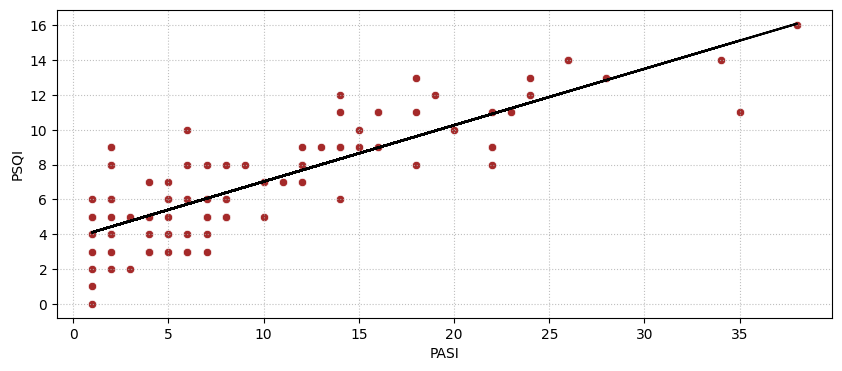

In [38]:
slope, intercept = np.polyfit(dataset['PASI'], dataset['PSQI'], 1)

plt.figure(figsize=(10,4))
ax = plt.subplot(111)
sns.scatterplot(data=dataset, x='PASI', y='PSQI', ax=ax, c='brown')
plt.plot(dataset['PASI'], slope*dataset['PASI']+intercept, c='black')
plt.grid(alpha=0.8, linestyle=':')
plt.show()

In [39]:
x = dataset['PASI']
y = dataset['PSQI']

x_with_const = pd.concat([pd.Series(np.ones(dataset.shape[0])), x], axis='columns').rename(columns={0: 'const'})

model = sm.OLS(endog=y, exog=x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PSQI   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     213.4
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           2.42e-26
Time:                        22:45:30   Log-Likelihood:                -203.40
No. Observations:                 100   AIC:                             410.8
Df Residuals:                      98   BIC:                             416.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7825      0.282     13.407      0.0

##### Observations:
</br>
<font color=brown size=2><b>
* As seen in the scatterplot, PSQI clearly increases with increase in PASI</br>
* The p-value is less then 5%, therefore, we can reject the Null Hypothesis. In other words, PASI has statistically significant relationship with PSQI

### PSS vs PSQI

<font color=brown size=2><b>
H0: PSS type does not have any effect on PSQI</br>
H1: PSS type has a significant effect on PSQI
</b></font>

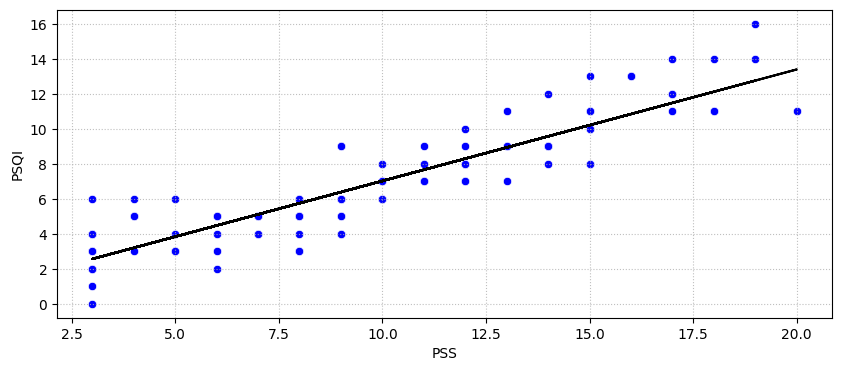

In [40]:
slope, intercept = np.polyfit(dataset['PSS'], dataset['PSQI'], 1)

plt.figure(figsize=(10,4))
ax = plt.subplot(111)
sns.scatterplot(data=dataset, x='PSS', y='PSQI', ax=ax, c='blue')
plt.plot(dataset['PSS'], slope*dataset['PSS']+intercept, c='black')
plt.grid(alpha=0.8, linestyle=':')
plt.show()

In [41]:
x = dataset['PSS']
y = dataset['PSQI']

x_with_const = pd.concat([pd.Series(np.ones(dataset.shape[0])), x], axis='columns').rename(columns={0: 'const'})

model = sm.OLS(endog=y, exog=x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PSQI   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     414.4
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           5.62e-37
Time:                        22:45:30   Log-Likelihood:                -178.50
No. Observations:                 100   AIC:                             361.0
Df Residuals:                      98   BIC:                             366.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6445      0.339      1.903      0.0

##### Observations:
</br>
<font color=brown size=2><b>
* As seen in the scatterplot, PSQI clearly increases with increase in PSS</br>
* The p-value is less then 5%, therefore, we can reject the Null Hypothesis. In other words, PSS has statistically significant relationship with PSQI

---

### Age vs PSQI

<font color=brown size=2><b>
H0: PSS type does not have any effect on PSQI</br>
H1: PSS type has a significant effect on PSQI
</b></font>

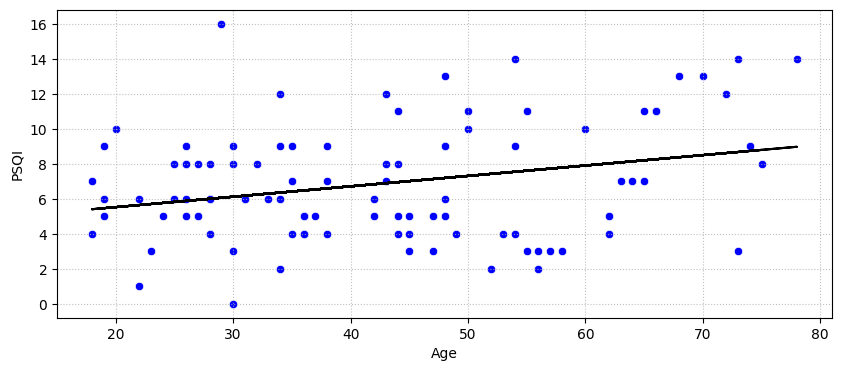

In [42]:
slope, intercept = np.polyfit(dataset['Age'], dataset['PSQI'], 1)

plt.figure(figsize=(10,4))
ax = plt.subplot(111)
sns.scatterplot(data=dataset, x='Age', y='PSQI', ax=ax, c='blue')
plt.plot(dataset['Age'], slope*dataset['Age']+intercept, c='black')
plt.grid(alpha=0.8, linestyle=':')
plt.show()

In [43]:
x = dataset['Age']
y = dataset['PSQI']

x_with_const = pd.concat([pd.Series(np.ones(dataset.shape[0])), x], axis='columns').rename(columns={0: 'const'})

model = sm.OLS(endog=y, exog=x_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   PSQI   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     8.522
Date:                Mon, 10 Feb 2025   Prob (F-statistic):            0.00435
Time:                        22:45:30   Log-Likelihood:                -257.04
No. Observations:                 100   AIC:                             518.1
Df Residuals:                      98   BIC:                             523.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3309      0.927      4.674      0.0

##### Observations:
</br>
<font color=brown size=2><b>
* As seen in the scatterplot, PSQI clearly increases with increase in Age. However, the rate of increment is negligible, as evidenced by the slope/coefficient</br>
* The p-value is less then 5%, therefore, we can reject the Null Hypothesis. In other words, Age has statistically significant relationship with PSQI

---